## Звіт до практичної роботи №3

### Виконала: студентка групи  22-ICT

#### Гупалік Анастасія

Практичні завдання (Python):
1. Реалізуйте функцію `insertion_sort(array_to_sort)`, яка сортує список `array_to_sort` за допомогою алгоритму сортування вставкою.
2. Реалізуйте функцію `quick_sort(array_to_sort)`, яка сортує список `array_to_sort` за допомогою алгоритму швидкого сортування.
3. Порівняйте ефективність алгоритмів сортування вставкою та швидкого сортування на списках різної довжини та з різним ступенем впорядкованості.
4. Виміряйте час виконання та кількість операцій кожного алгоритму та `[*]`побудуйте графік залежності часу та кількості операцій виконання від розміру та впорядкованості списку.
6. `[*За бажанням]` Дослідіть вплив вибору опорного елемента на ефективність алгоритму швидкого сортування. Реалізуйте різні стратегії вибору опорного елемента (перший, останній, випадковий, медіана трьох) та порівняйте їх ефективність.
7. Висновок


In [19]:
def insertion_sort(array_to_sort):

    n = len(array_to_sort)
    for i in range(1,n):
      insert_index = i
      current_value = array_to_sort.pop(i)
      for j in range(i-1, -1, -1):
        if array_to_sort[j] > current_value:
          insert_index = j
      array_to_sort.insert(insert_index, current_value)

    return array_to_sort

mylist = [64, 34, 25, 12, 22, 11, 90, 5]

sorted_list = insertion_sort(mylist)
print(sorted_list)

[5, 11, 12, 22, 25, 34, 64, 90]


In [20]:
def quick_sort(array_to_sort):

    def partition(array, low, high):
      pivot = array[high]
      i = low - 1

      for j in range(low, high):
         if array[j] <= pivot:
           i += 1
           array[i], array[j] = array[j], array[i]

      array[i+1], array[high] = array[high], array[i+1]
      return i+1

    def _quicksort_recursive(array, low, high):

      if low < high:
        pivot_index = partition(array, low, high)
        _quicksort_recursive(array, low, pivot_index-1)
        _quicksort_recursive(array, pivot_index+1, high)

    _quicksort_recursive(array_to_sort, 0, len(array_to_sort) - 1)

    return array_to_sort

mylist = [64, 34, 25, 12, 22, 11, 90, 5]

sorted_list = quick_sort(mylist)
print(sorted_list)

[5, 11, 12, 22, 25, 34, 64, 90]


In [21]:
import random
import sys

sys.setrecursionlimit(2000)

def quick_sort_counted(array_to_sort):
    ops_counter = 0

    def partition(array, low, high):
        nonlocal ops_counter
        pivot = array[high]
        i = low - 1

        for j in range(low, high):
            ops_counter += 1
            if array[j] <= pivot:
                i += 1
                array[i], array[j] = array[j], array[i]
                ops_counter += 1

        array[i+1], array[high] = array[high], array[i+1]
        ops_counter += 1
        return i+1

    def _quicksort_recursive(array, low, high):
        if low < high:
            pivot_index = partition(array, low, high)
            _quicksort_recursive(array, low, pivot_index-1)
            _quicksort_recursive(array, pivot_index+1, high)

    array_copy = array_to_sort.copy()
    _quicksort_recursive(array_copy, 0, len(array_copy) - 1)

    return array_copy, ops_counter

def insertion_sort_counted(array_to_sort):
    ops_counter = 0
    array_copy = array_to_sort.copy()

    n = len(array_copy)
    for i in range(1, n):
        insert_index = i
        current_value = array_copy.pop(i)
        ops_counter += 1

        for j in range(i-1, -1, -1):
            ops_counter += 1
            if array_copy[j] > current_value:
                insert_index = j
            else:
                break

        array_copy.insert(insert_index, current_value)
        ops_counter += 1

    return array_copy, ops_counter

list_size = 200
random_list = [random.randint(0, 1000) for _ in range(list_size)]
sorted_list = sorted(random_list)

print(f"ТЕСТУВАННЯ НА СПИСКУ З {list_size} ЕЛЕМЕНТІВ\n")
print("1. Випадковий (рандомний) список:")

_, qs_count = quick_sort_counted(random_list)
print(f"Quick Sort виконав операцій:    {qs_count}")

_, is_count = insertion_sort_counted(random_list)
print(f"Insertion Sort виконав операцій: {is_count}")

print("\n2. Вже відсортований список:")

_, qs_sorted_count = quick_sort_counted(sorted_list)
print(f"Quick Sort виконав операцій:    {qs_sorted_count}")

_, is_sorted_count = insertion_sort_counted(sorted_list)
print(f"Insertion Sort виконав операцій: {is_sorted_count}")

ТЕСТУВАННЯ НА СПИСКУ З 200 ЕЛЕМЕНТІВ

1. Випадковий (рандомний) список:
Quick Sort виконав операцій:    2617
Insertion Sort виконав операцій: 11498

2. Вже відсортований список:
Quick Sort виконав операцій:    39999
Insertion Sort виконав операцій: 597


РЕЗУЛЬТАТИ ТЕСТУВАННЯ

Розмір списку: 10
Метод Quick Sort (10):
  Рандомний:     час 0.000011 с, кількість операцій 38
  Відсортований: час 0.000007 с, кількість операцій 99
Метод Insertion Sort (10):
  Рандомний:     час 0.000007 с, кількість операцій 43
  Відсортований: час 0.000003 с, кількість операцій 27

------------------------------

Розмір списку: 100
Метод Quick Sort (100):
  Рандомний:     час 0.000073 с, кількість операцій 1118
  Відсортований: час 0.000515 с, кількість операцій 9999
Метод Insertion Sort (100):
  Рандомний:     час 0.000122 с, кількість операцій 2773
  Відсортований: час 0.000024 с, кількість операцій 297

------------------------------



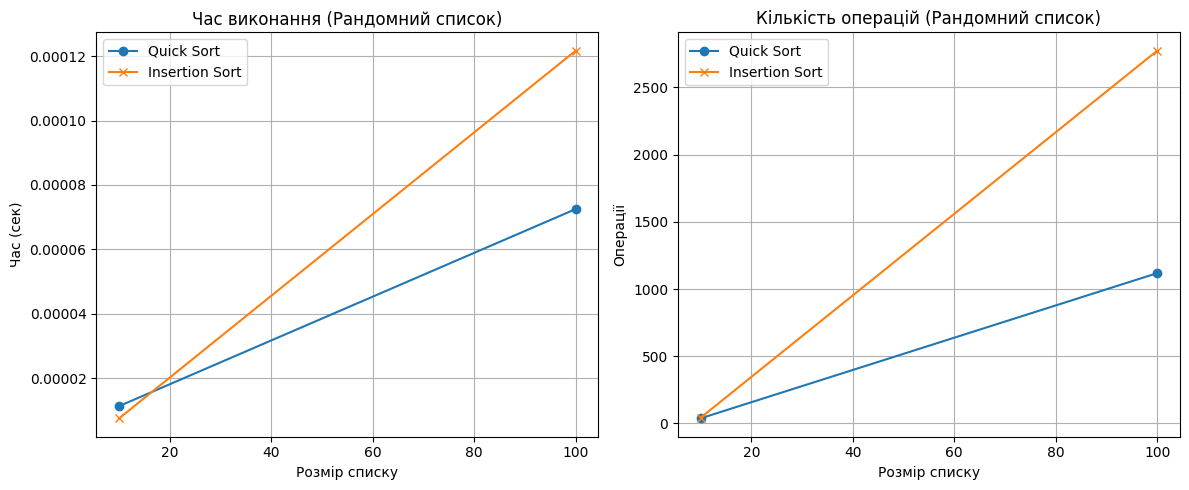

In [22]:
import random
import time
import sys
import matplotlib.pyplot as plt

sys.setrecursionlimit(3000)

def quick_sort_measured(array_to_sort):
    ops_counter = 0

    def partition(array, low, high):
        nonlocal ops_counter
        pivot = array[high]
        i = low - 1
        for j in range(low, high):
            ops_counter += 1
            if array[j] <= pivot:
                i += 1
                array[i], array[j] = array[j], array[i]
                ops_counter += 1
        array[i+1], array[high] = array[high], array[i+1]
        ops_counter += 1
        return i+1

    def _quicksort_recursive(array, low, high):
        if low < high:
            pivot_index = partition(array, low, high)
            _quicksort_recursive(array, low, pivot_index-1)
            _quicksort_recursive(array, pivot_index+1, high)

    start_time = time.perf_counter()
    array_copy = array_to_sort.copy()
    _quicksort_recursive(array_copy, 0, len(array_copy) - 1)
    end_time = time.perf_counter()

    return end_time - start_time, ops_counter

def insertion_sort_measured(array_to_sort):
    ops_counter = 0
    start_time = time.perf_counter()
    array_copy = array_to_sort.copy()
    n = len(array_copy)

    for i in range(1, n):
        insert_index = i
        current_value = array_copy.pop(i)
        ops_counter += 1

        for j in range(i-1, -1, -1):
            ops_counter += 1
            if array_copy[j] > current_value:
                insert_index = j
            else:
                break

        array_copy.insert(insert_index, current_value)
        ops_counter += 1

    end_time = time.perf_counter()
    return end_time - start_time, ops_counter

list_sizes = [10, 100]
qs_times_random, qs_ops_random = [], []
is_times_random, is_ops_random = [], []

print("РЕЗУЛЬТАТИ ТЕСТУВАННЯ\n")

for size in list_sizes:
    random_list = [random.randint(0, 10000) for _ in range(size)]
    sorted_list = sorted(random_list)

    qs_rand_time, qs_rand_ops = quick_sort_measured(random_list)
    qs_sort_time, qs_sort_ops = quick_sort_measured(sorted_list)

    qs_times_random.append(qs_rand_time)
    qs_ops_random.append(qs_rand_ops)

    is_rand_time, is_rand_ops = insertion_sort_measured(random_list)
    is_sort_time, is_sort_ops = insertion_sort_measured(sorted_list)

    is_times_random.append(is_rand_time)
    is_ops_random.append(is_rand_ops)

    print(f"Розмір списку: {size}")

    print(f"Метод Quick Sort ({size}):")
    print(f"  Рандомний:     час {qs_rand_time:.6f} с, кількість операцій {qs_rand_ops}")
    print(f"  Відсортований: час {qs_sort_time:.6f} с, кількість операцій {qs_sort_ops}")

    print(f"Метод Insertion Sort ({size}):")
    print(f"  Рандомний:     час {is_rand_time:.6f} с, кількість операцій {is_rand_ops}")
    print(f"  Відсортований: час {is_sort_time:.6f} с, кількість операцій {is_sort_ops}")

    print("\n" + "-"*30 + "\n")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list_sizes, qs_times_random, marker='o', label='Quick Sort')
plt.plot(list_sizes, is_times_random, marker='x', label='Insertion Sort')
plt.title('Час виконання (Рандомний список)')
plt.xlabel('Розмір списку')
plt.ylabel('Час (сек)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(list_sizes, qs_ops_random, marker='o', label='Quick Sort')
plt.plot(list_sizes, is_ops_random, marker='x', label='Insertion Sort')
plt.title('Кількість операцій (Рандомний список)')
plt.xlabel('Розмір списку')
plt.ylabel('Операції')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Висновок

Ефективність сортування залежить від характеру вхідних даних. Insertion Sort мінімізує витрати на майже відсортованих даних, тоді як Quick Sort забезпечує продуктивність на великих обсягах завдяки логарифмічній складності.

1. Принцип роботи сортування вставкоюАлгоритм умовно ділить масив на відсортовану та невідсортовану частини. Кожен наступний елемент з невідсортованої частини порівнюється з елементами відсортованої (справа наліво) та вставляється у знайдену позицію після зсуву більших значень вправо.

2. Принцип роботи швидкого сортуванняБазується на стратегії «розділяй і володарюй». Обирається опорний елемент (pivot). Масив перегруповується (partition): елементи, менші за pivot, переміщуються вліво, більші — вправо. Процес рекурсивно повторюється для отриманих підмасивів.

3. Часова складність сортування вставкоюНайгірший/Середній: $O(N^2)$ — зворотний порядок або випадкові дані.Найкращий: $O(N)$ — вже відсортований масив.Ефективність: Висока на малих обсягах даних або майже впорядкованих масивах.

4. Часова складність швидкого сортуванняНайгірший: $O(N^2)$ — невдалий вибір pivot (наприклад, мінімальний/максимальний елемент), що призводить до незбалансованого розбиття.Середній/Найкращий: $O(N \log N)$.Ефективність: Залежить від алгоритму вибору опорного елемента (pivot).

5. Порівняння та застосуванняСортування вставкою доцільно використовувати для невеликих масивів ($N < 50$) або даних, що частково впорядковані, через відсутність рекурсивних витрат. Швидке сортування — оптимальний вибір для великих масивів невпорядкованих даних.